In [1]:
import numpy as np,pandas as pd
import os

In [2]:
os.chdir("D:\Manipal Pro learn\Term1\EDA\Dataset")
hranalytics = pd.read_csv("HR Analytics.csv")
hranalytics.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,...,8,11,3,1,8,1,6,4,0,5
1,49,0,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,...,1,23,4,4,10,3,10,7,1,7
2,37,1,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,...,6,15,3,2,7,3,0,0,0,0
3,33,0,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,...,1,11,3,3,8,3,8,7,3,0
4,27,0,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,...,9,12,3,4,6,3,2,2,2,2


# 1.What proportion of our staff are leaving?

In [3]:
len(hranalytics[hranalytics['Attrition'] == 1]) / len(hranalytics)

0.16122448979591836

# 2.	What role does gender and age play in this workplace?

In [4]:
len(hranalytics[(hranalytics['Gender'] == 'Male' )& (hranalytics['Attrition'] == 1)]) /len(hranalytics[(hranalytics['Gender'] == 'Male' )])

0.17006802721088435

In [5]:
len(hranalytics[(hranalytics['Gender'] == 'Female' )& (hranalytics['Attrition'] == 1)]) /len(hranalytics[(hranalytics['Gender'] == 'Female' )])

0.14795918367346939

In [4]:
deptage = hranalytics[hranalytics['Attrition'] == 1].groupby(['Department','Gender','Age'])['EmployeeNumber'].count().reset_index()
#deptage = hranalytics.groupby(['Department','Gender','Age'])['EmployeeNumber'].count().reset_index()
deptage.head()

,Department,Gender,Age,EmployeeNumber
0,Human Resources,Female,26,2
1,Human Resources,Female,27,1
2,Human Resources,Female,30,1
3,Human Resources,Female,34,2
4,Human Resources,Male,19,1


In [5]:
def desc(num):
    if num <= 30:
        return "Young"
    elif num <= 40:
        return "Mid"
    elif num > 40:
        return "Old"
deptage['Age type'] = deptage['Age'].apply(desc)
deptage.head()

,Department,Gender,Age,EmployeeNumber,Age type
0,Human Resources,Female,26,2,Young
1,Human Resources,Female,27,1,Young
2,Human Resources,Female,30,1,Young
3,Human Resources,Female,34,2,Mid
4,Human Resources,Male,19,1,Young


In [8]:
deptgenderage = deptage.groupby(['Department','Gender','Age type'])['EmployeeNumber'].sum().reset_index()
deptgenderage.head()

,Department,Gender,Age type,EmployeeNumber
0,Human Resources,Female,Mid,2
1,Human Resources,Female,Young,4
2,Human Resources,Male,Mid,2
3,Human Resources,Male,Old,1
4,Human Resources,Male,Young,3


In [9]:
deptgenderage1 = deptgenderage.groupby(['Gender','Age type'])['EmployeeNumber'].sum().reset_index()
deptgenderage1.pivot('Gender','Age type','EmployeeNumber').plot(kind='bar')

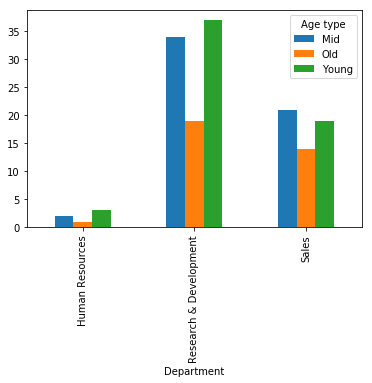

In [10]:
deptgenderage[deptgenderage['Gender'] == 'Male'][['Department','Age type','EmployeeNumber']].pivot('Department','Age type','EmployeeNumber').plot(kind='bar')

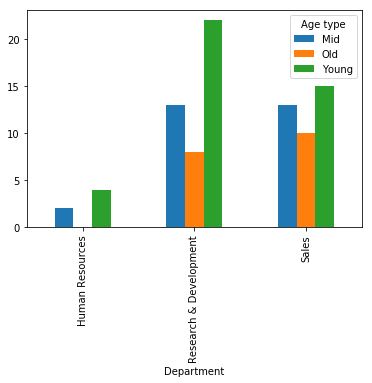

In [11]:
deptgenderage[deptgenderage['Gender'] == 'Female'][['Department','Age type','EmployeeNumber']].pivot('Department','Age type','EmployeeNumber').plot(kind='bar')

# 3.	How much does income matter

In [12]:
averagesalarydept = hranalytics.groupby(['Department','TotalWorkingYears'])['MonthlyIncome'].mean().reset_index()
averagesalarydept = averagesalarydept.rename(columns={'MonthlyIncome':'AverageIncome'})
averagesalarydept.head()

,Department,TotalWorkingYears,AverageIncome
0,Human Resources,1,2446.500000
1,Human Resources,2,2849.000000
2,Human Resources,3,2425.500000
3,Human Resources,4,2922.666667
4,Human Resources,5,3600.000000


In [19]:
deptincome = hranalytics[hranalytics['Attrition'] == 1].merge(averagesalarydept,how='left',on=['Department','TotalWorkingYears'])
deptincome.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,AverageIncome
0,41,1,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,...,11,3,1,8,1,6,4,0,5,5757.967742
1,37,1,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,...,15,3,2,7,3,0,0,0,0,3624.309091
2,28,1,Travel_Rarely,Research & Development,24,3,Life Sciences,19,3,Male,...,14,3,2,6,3,4,2,0,3,3530.753086
3,36,1,Travel_Rarely,Sales,9,4,Life Sciences,27,3,Male,...,23,4,2,10,3,5,3,0,3,6948.709677
4,34,1,Travel_Rarely,Research & Development,6,1,Medical,31,2,Male,...,11,3,3,8,3,4,2,1,3,3610.835821


In [22]:
#deptincome['Income desc'] = 
def desc(df):
    if df['MonthlyIncome'] <= df['AverageIncome']:
        return 'less income'
    else :
        return 'high income'

ls = pd.DataFrame()
for i,data in deptincome.iterrows():
    cur_row = {
        'EmployeeNumber' : data['EmployeeNumber'],
        'Reason' : desc(data)
    }
    ls = ls.append( cur_row,ignore_index=True)
ls.head()

,EmployeeNumber,Reason
0,1.0,high income
1,4.0,less income
2,19.0,less income
3,27.0,less income
4,31.0,less income


In [24]:
deptincome = deptincome.merge(ls)
deptincome.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,AverageIncome,Reason
0,41,1,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,...,3,1,8,1,6,4,0,5,5757.967742,high income
1,37,1,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,...,3,2,7,3,0,0,0,0,3624.309091,less income
2,28,1,Travel_Rarely,Research & Development,24,3,Life Sciences,19,3,Male,...,3,2,6,3,4,2,0,3,3530.753086,less income
3,36,1,Travel_Rarely,Sales,9,4,Life Sciences,27,3,Male,...,4,2,10,3,5,3,0,3,6948.709677,less income
4,34,1,Travel_Rarely,Research & Development,6,1,Medical,31,2,Male,...,3,3,8,3,4,2,1,3,3610.835821,less income


In [29]:
deptincome.groupby('Reason').size().reset_index()

,Reason,0
0,high income,100
1,less income,137


# 4.	What is the average age of the employees in each department excluding the outliers?

In [35]:
departmentage = hranalytics.groupby(['Department','Age']).size().reset_index()
departmentage.head()

,Department,Age,0
0,Human Resources,19,1
1,Human Resources,24,2
2,Human Resources,25,1
3,Human Resources,26,3
4,Human Resources,27,1


In [36]:
departmentage['prodage'] = departmentage['Age'] * departmentage[0]
departmentage.head()

,Department,Age,0,prodage
0,Human Resources,19,1,19
1,Human Resources,24,2,48
2,Human Resources,25,1,25
3,Human Resources,26,3,78
4,Human Resources,27,1,27


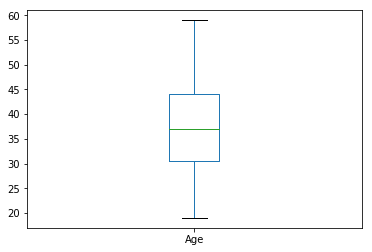

In [54]:
hranalytics[hranalytics['Department'] == 'Human Resources']['Age'].plot(kind='box')

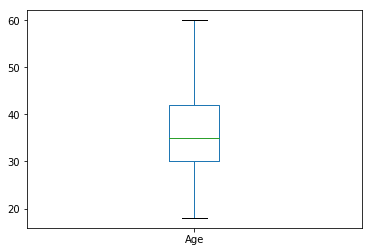

In [55]:
hranalytics[hranalytics['Department'] == 'Sales']['Age'].plot(kind='box')

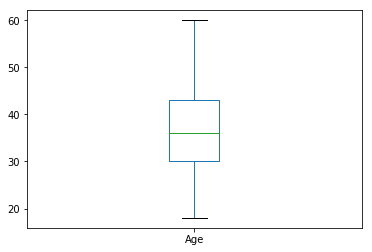

In [56]:
hranalytics[hranalytics['Department'] == 'Research & Development']['Age'].plot(kind='box')

In [51]:
avgdeptage = pd.DataFrame()
for i,data in departmentage.groupby('Department'):
    cur_row =  {
        'department' : i,
        'Average Age' : data['prodage'].sum() / data[0].sum()
    }
    avgdeptage = avgdeptage.append(cur_row,ignore_index=True)
avgdeptage

,Average Age,department
0,37.809524,Human Resources
1,37.042664,Research & Development
2,36.542601,Sales


# 5.	Which education field has the highest attrition rate for the employees with less than 5 years of work experience and monthly salary between 2000 and 4000 USD.

In [57]:
expbelow5 = hranalytics[(hranalytics['TotalWorkingYears'] < 5) & (hranalytics['MonthlyIncome'] > 2000) & (hranalytics['MonthlyIncome'] < 4000)]
expbelow5.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
7,30,0,Travel_Rarely,Research & Development,24,1,Life Sciences,11,4,Male,...,1,22,4,2,1,3,1,0,0,0
13,34,0,Travel_Rarely,Research & Development,19,2,Medical,18,2,Male,...,0,11,3,3,3,3,2,2,1,2
17,22,0,Non-Travel,Research & Development,16,2,Medical,22,4,Male,...,1,13,3,2,1,2,1,0,0,0
36,50,1,Travel_Rarely,Sales,3,2,Marketing,47,1,Male,...,1,14,3,3,3,3,3,2,0,2
37,35,0,Travel_Rarely,Sales,2,3,Marketing,49,4,Female,...,1,13,3,1,2,3,2,2,2,2


In [60]:
expbelow5[expbelow5['Attrition'] == 1].groupby(['EducationField']).size().reset_index().sort_values(by=0,ascending=Falselse)

,EducationField,0
1,Life Sciences,19
3,Medical,12
5,Technical Degree,9
2,Marketing,8
0,Human Resources,3
4,Other,2


# 6.	What is the average salary hike for the employees with work experience between 8 years to 10 years

In [63]:
work8to10 = hranalytics[(hranalytics['TotalWorkingYears'] >= 8) & (hranalytics['TotalWorkingYears'] <= 10)]
work8to10.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,...,8,11,3,1,8,1,6,4,0,5
1,49,0,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,...,1,23,4,4,10,3,10,7,1,7
3,33,0,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,...,1,11,3,3,8,3,8,7,3,0
5,32,0,Travel_Frequently,Research & Development,2,2,Life Sciences,8,4,Male,...,0,13,3,3,8,2,7,7,3,6
8,38,0,Travel_Frequently,Research & Development,23,3,Life Sciences,12,4,Male,...,0,21,4,2,10,3,9,7,1,8


In [64]:
work8to10['PercentSalaryHike'].mean()

15.266832917705736

# 7.	Is the “number of companies worked” normally distributed for the employees with work experience between 8 years and 10 years.

In [66]:
meancom = work8to10['NumCompaniesWorked'].mean()
meancom

2.7381546134663344

In [67]:
len(work8to10[work8to10['NumCompaniesWorked'] > meancom]) == len(work8to10[work8to10['NumCompaniesWorked'] < meancom])

False

# 8.	Divided the whole data into two groups – Group1: people with monthly salary more than the average salary of all employees and people with monthly salary less than the average salary of all employees. For each group analysis the attrition rate in each Job Role. Find the Job role which has the highest attrition rate gap across the group

In [3]:
avgsalary = hranalytics['MonthlyIncome'].mean()
avgsalary

6502.931292517007

In [4]:
def desc(df):
    if df['MonthlyIncome'] <= avgsalary:
        return 'less income'
    else :
        return 'high income'

ls = pd.DataFrame()
for i,data in hranalytics.iterrows():
    cur_row = {
        'EmployeeNumber' : data['EmployeeNumber'],
        'Reason' : desc(data)
    }
    ls = ls.append( cur_row,ignore_index=True)
ls.head()

,EmployeeNumber,Reason
0,1.0,less income
1,2.0,less income
2,4.0,less income
3,5.0,less income
4,7.0,less income


In [5]:
incomeemp = pd.merge(hranalytics,ls,how='left')
incomeemp.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Reason
0,41,1,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,...,11,3,1,8,1,6,4,0,5,less income
1,49,0,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,...,23,4,4,10,3,10,7,1,7,less income
2,37,1,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,...,15,3,2,7,3,0,0,0,0,less income
3,33,0,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,...,11,3,3,8,3,8,7,3,0,less income
4,27,0,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,...,12,3,4,6,3,2,2,2,2,less income


In [6]:
highincome = incomeemp[incomeemp['Reason']=='high income']
lowincome = incomeemp[incomeemp['Reason']=='less income']
lowincome.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Reason
0,41,1,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,...,11,3,1,8,1,6,4,0,5,less income
1,49,0,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,...,23,4,4,10,3,10,7,1,7,less income
2,37,1,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,...,15,3,2,7,3,0,0,0,0,less income
3,33,0,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,...,11,3,3,8,3,8,7,3,0,less income
4,27,0,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,...,12,3,4,6,3,2,2,2,2,less income


# Attrition rate in each Job Role among lowincome employees

In [30]:
lowincomeattrited = lowincome[lowincome['Attrition'] == 1].groupby('JobRole').size().reset_index()
lowincomeattrited = lowincomeattrited.rename(columns={0:'Attrited'})
lowincomeattrited

,JobRole,Attrited
0,Healthcare Representative,1
1,Human Resources,10
2,Laboratory Technician,62
3,Manufacturing Director,5
4,Research Scientist,47
5,Sales Executive,27
6,Sales Representative,33


In [31]:
lowincometotal = lowincome.groupby('JobRole').size().reset_index()
lowincometotal = lowincometotal.rename(columns={0:'Total'})
lowincometotal

,JobRole,Total
0,Healthcare Representative,54
1,Human Resources,46
2,Laboratory Technician,256
3,Manufacturing Director,75
4,Research Scientist,287
5,Sales Executive,177
6,Sales Representative,82


In [33]:
lowincometotalattrited = lowincometotal.merge(lowincomeattrited)
lowincometotalattrited

,JobRole,Total,Attrited
0,Healthcare Representative,54,1
1,Human Resources,46,10
2,Laboratory Technician,256,62
3,Manufacturing Director,75,5
4,Research Scientist,287,47
5,Sales Executive,177,27
6,Sales Representative,82,33


In [34]:
lowincometotalattrited['%'] = lowincometotalattrited['Attrited'] / lowincometotalattrited['Total'] * 100
lowincometotalattrited.sort_values(by='%',ascending=False)

,JobRole,Total,Attrited,%
6,Sales Representative,82,33,40.243902
2,Laboratory Technician,256,62,24.218750
1,Human Resources,46,10,21.739130
4,Research Scientist,287,47,16.376307
5,Sales Executive,177,27,15.254237
3,Manufacturing Director,75,5,6.666667
0,Healthcare Representative,54,1,1.851852


# Attrition rate in each Job Role among Highincome employees

In [35]:
highincomeattrited = highincome[highincome['Attrition'] == 1].groupby('JobRole').size().reset_index()
highincomeattrited = highincomeattrited.rename(columns={0:'Attrited'})
highincomeattrited

,JobRole,Attrited
0,Healthcare Representative,8
1,Human Resources,2
2,Manager,5
3,Manufacturing Director,5
4,Research Director,2
5,Sales Executive,30


In [36]:
highincometotal = highincome.groupby('JobRole').size().reset_index()
highincometotal = highincometotal.rename(columns={0:'Total'})
highincometotal

,JobRole,Total
0,Healthcare Representative,77
1,Human Resources,6
2,Laboratory Technician,3
3,Manager,102
4,Manufacturing Director,70
5,Research Director,80
6,Research Scientist,5
7,Sales Executive,149
8,Sales Representative,1


In [38]:
highincometotalattrited = highincometotal.merge(highincomeattrited)
highincometotalattrited

,JobRole,Total,Attrited
0,Healthcare Representative,77,8
1,Human Resources,6,2
2,Manager,102,5
3,Manufacturing Director,70,5
4,Research Director,80,2
5,Sales Executive,149,30


In [39]:
highincometotalattrited['%'] = highincometotalattrited['Attrited'] / highincometotalattrited['Total'] * 100
highincometotalattrited.sort_values(by='%',ascending=False)

,JobRole,Total,Attrited,%
1,Human Resources,6,2,33.333333
5,Sales Executive,149,30,20.134228
0,Healthcare Representative,77,8,10.389610
3,Manufacturing Director,70,5,7.142857
2,Manager,102,5,4.901961
4,Research Director,80,2,2.500000


# 9. How does Relationship Satisfaction affect termination?

In [47]:
jobtermination = hranalytics.groupby(['RelationshipSatisfaction']).size().reset_index()
jobtermination = jobtermination.rename(columns={0:'Total'})
jobtermination.head()

,RelationshipSatisfaction,Total
0,1,276
1,2,303
2,3,459
3,4,432


In [48]:
jobterminationattrition = hranalytics[hranalytics['Attrition']==1].groupby(['RelationshipSatisfaction']).size().reset_index()
jobterminationattrition = jobterminationattrition.rename(columns={0:'Attrited'})
jobterminationattrition.head()

,RelationshipSatisfaction,Attrited
0,1,57
1,2,45
2,3,71
3,4,64


In [49]:
jobterminationtotal = jobtermination.merge(jobterminationattrition)
jobterminationtotal.head()

,RelationshipSatisfaction,Total,Attrited
0,1,276,57
1,2,303,45
2,3,459,71
3,4,432,64


In [54]:
jobterminationtotal['RelationshipSatisfaction'] = jobterminationtotal['RelationshipSatisfaction'].map({1:'Low',2:'Medium',3:'High',4:'Very High'})
jobterminationtotal

,RelationshipSatisfaction,Total,Attrited,%
0,Low,276,57,20.652174
1,Medium,303,45,14.851485
2,High,459,71,15.468410
3,Very High,432,64,14.814815


In [55]:
jobterminationtotal['%'] = jobterminationtotal['Attrited'] / jobterminationtotal['Total'] * 100
jobterminationtotal.sort_values(by='%',ascending=False)

,RelationshipSatisfaction,Total,Attrited,%
0,Low,276,57,20.652174
2,High,459,71,15.468410
1,Medium,303,45,14.851485
3,Very High,432,64,14.814815


# 10. Which Education field is more likely to leave?

In [22]:
educationattrited = hranalytics[hranalytics['Attrition']== 1].groupby(['JobRole'])['EducationField'].size().reset_index()
educationattrited = educationattrited.rename(columns={'EducationField':'Attrited'})
educationattrited

,JobRole,Attrited
0,Healthcare Representative,9
1,Human Resources,12
2,Laboratory Technician,62
3,Manager,5
4,Manufacturing Director,10
5,Research Director,2
6,Research Scientist,47
7,Sales Executive,57
8,Sales Representative,33


In [23]:
educationtotal = hranalytics.groupby(['JobRole'])['EducationField'].size().reset_index()
educationtotal = educationtotal.rename(columns={'EducationField':'Total'})
educationtotal

,JobRole,Total
0,Healthcare Representative,131
1,Human Resources,52
2,Laboratory Technician,259
3,Manager,102
4,Manufacturing Director,145
5,Research Director,80
6,Research Scientist,292
7,Sales Executive,326
8,Sales Representative,83


In [24]:
educationtotalattrited = educationtotal.merge(educationattrited)
educationtotalattrited

,JobRole,Total,Attrited
0,Healthcare Representative,131,9
1,Human Resources,52,12
2,Laboratory Technician,259,62
3,Manager,102,5
4,Manufacturing Director,145,10
5,Research Director,80,2
6,Research Scientist,292,47
7,Sales Executive,326,57
8,Sales Representative,83,33


In [26]:
educationtotalattrited['%'] = educationtotalattrited['Attrited'] / educationtotalattrited['Total'] * 100
educationtotalattrited.sort_values(by='%',ascending=False)

,JobRole,Total,Attrited,%
8,Sales Representative,83,33,39.759036
2,Laboratory Technician,259,62,23.938224
1,Human Resources,52,12,23.076923
7,Sales Executive,326,57,17.484663
6,Research Scientist,292,47,16.095890
4,Manufacturing Director,145,10,6.896552
0,Healthcare Representative,131,9,6.870229
3,Manager,102,5,4.901961
5,Research Director,80,2,2.500000
